In [23]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [24]:
import pandas as pd
import numpy as np

In [32]:
# reads in a file separated by multiple spaces.
# So, sep='\s+' is needed. 
df_hip = pd.read_csv( \
    'http://bogotobogo.com/python/images/python_matplotlib/HIP_star.dat',\
                     sep='\s+')

In [26]:
df_hip.shape

(2720, 9)

In [27]:
# check if a column has no data (or NaN)
df_hip.isnull().sum()

HIP       0
Vmag      1
RA        1
DE        1
Plx       1
pmRA      1
pmDE      1
e_Plx     1
B-V      42
dtype: int64

In [28]:
# drop any row if any of the column is missing data
df_hip = df_hip.dropna()

In [29]:
# check if a column has no data (or NaN) again
df_hip.isnull().sum()

HIP      0
Vmag     0
RA       0
DE       0
Plx      0
pmRA     0
pmDE     0
e_Plx    0
B-V      0
dtype: int64

In [30]:
df_hip.shape

(2678, 9)

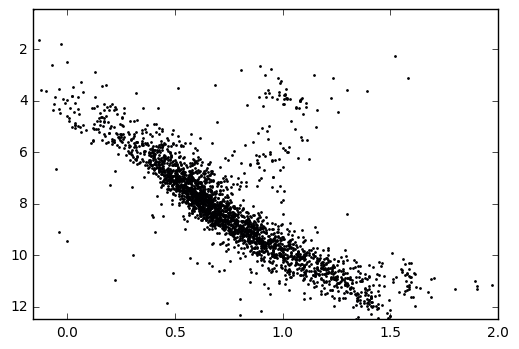

In [31]:
x = df_hip.iloc[:,8].values 
y = df_hip.iloc[:,1].values
scatter(x,y,s=1) # marker size
ylim([y.min(axis=0),y.max(axis=0)]) # x-axis range
xlim([x.min(axis=0),2]) # x-axis range
gca().invert_yaxis()  # y-axis reversed
show()

In [ ]:
# The lines below are just for exercise 
# to check data and manipulating numpy arrays

In [9]:
df_hip[:5]

,HIP,Vmag,RA,DE,Plx,pmRA,pmDE,e_Plx,B-V
0,2,9.27,0.003797,-19.498837,21.90,181.21,-0.93,3.10,0.999
1,38,8.65,0.111047,-79.061831,23.84,162.30,-62.40,0.78,0.778
2,47,10.78,0.135192,-56.835248,24.45,-44.21,-145.90,1.97,1.150
3,54,10.57,0.151656,17.968956,20.97,367.14,-19.49,1.71,1.030
4,74,9.93,0.221873,35.752722,24.22,157.73,-40.31,1.36,1.068


In [10]:
df_hip.iloc[:1,]

,HIP,Vmag,RA,DE,Plx,pmRA,pmDE,e_Plx,B-V
0,2,9.27,0.003797,-19.498837,21.9,181.21,-0.93,3.1,0.999


In [11]:
df_hip.iloc[:1,:1].values

array([['2']], dtype=object)

In [12]:
df_hip.iloc[:5,8]

0    0.999
1    0.778
2    1.150
3    1.030
4    1.068
Name: B-V, dtype: float64

In [13]:
df_hip.iloc[:5,2]

0    0.003797
1    0.111047
2    0.135192
3    0.151656
4    0.221873
Name: RA, dtype: float64

In [14]:
np.unique(df_hip['HIP']).shape

(2678,)

In [15]:
df_hip.columns.values

array(['HIP', 'Vmag', 'RA', 'DE', 'Plx', 'pmRA', 'pmDE', 'e_Plx', 'B-V'], dtype=object)

In [16]:
df_hip.columns.values[1]

'Vmag'

In [17]:
df_hip.columns.shape[0]

9

In [18]:
column_names = []
# Here we can use df_hip.columns.shape[0] instead of df_hip.shape[1]
for i in range(df_hip.shape[1]):
    column_names.append(df_hip.columns.values[i].lower())
column_names

['hip', 'vmag', 'ra', 'de', 'plx', 'pmra', 'pmde', 'e_plx', 'b-v']

In [19]:
columns_list = list(df_hip.columns.values)
columns_list

['HIP', 'Vmag', 'RA', 'DE', 'Plx', 'pmRA', 'pmDE', 'e_Plx', 'B-V']

In [20]:
hip, ra, de, plx, pmra, pmde, eplx, bv = df_hip.iloc[:,0], df_hip.iloc[:,1], df_hip.iloc[:,2], \
df_hip.iloc[:,3],df_hip.iloc[:,4],df_hip.iloc[:,5],df_hip.iloc[:,6],df_hip.iloc[:,7]
hip[:10]

0      2
1     38
2     47
3     54
4     74
5     81
6    110
7    135
8    143
9    149
Name: HIP, dtype: object

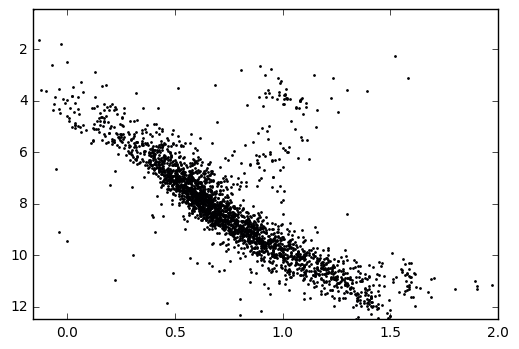

In [21]:
x = df_hip.iloc[:,8].values 
y = df_hip.iloc[:,1].values
scatter(x,y,s=1) # marker size
ylim([y.min(axis=0),y.max(axis=0)]) # x-axis range
xlim([x.min(axis=0),2]) # x-axis range
gca().invert_yaxis()  # y-axis reversed
show()

In [300]:
# test - numpy.max(a[:,0])
#x.min(axis=0)
a = np.arange(12).reshape(4,3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [303]:
a.sum(axis=0)

array([18, 22, 26])

In [22]:
x.dtype

dtype('float64')

In [140]:
df_hip.iloc[:, 1:].shape, df_hip.iloc[:, 0].shape

((2678, 8), (2678,))

In [141]:
from sklearn.model_selection import train_test_split

X, y = df_hip.iloc[:, 1:].values, df_hip.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

In [142]:
X.shape, X_train.shape, X_test.shape

((2678, 8), (1874, 8), (804, 8))

In [143]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [146]:
X_train_std[:5,], y_train[:5]

(array([[-0.0169402 ,  1.18339739, -0.69695438, -0.44519009,  0.13128363,
         -0.13123376, -0.25425838, -0.40944117],
        [ 0.07417596,  0.21142778, -1.32295129, -0.05763177, -0.89331813,
          0.42076757, -0.21837074, -0.24818919],
        [ 0.17601167,  0.82414448, -0.88661343,  0.13967065,  0.1392446 ,
         -0.07454575, -0.16197587, -0.25749218],
        [ 1.06037443,  1.6415523 , -0.96677108, -1.40351613,  0.71342958,
         -0.64536869,  0.03796955,  0.7534337 ],
        [-2.34308225, -1.32703361,  0.04557465,  0.88660124,  0.15075069,
          0.44680536, -0.26451199, -2.27624296]]),
 array(['98839', '63862', '85588', '115344', '9487'], dtype=object))

In [145]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

ZeroDivisionError: float division by zero

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./images/lda3.png', dpi=300)
plt.show()

In [ ]:
# TEST

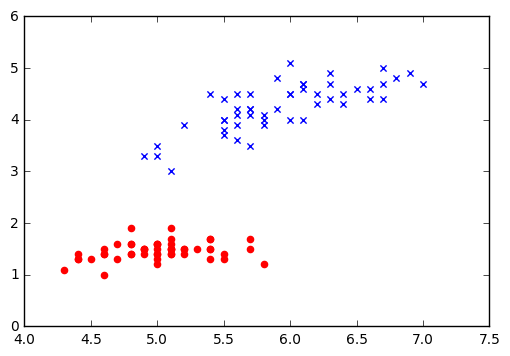

In [209]:


from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import numpy as np


df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/iris/iris.data', header=None)
df.tail()

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

In [232]:
type(X), X.shape

(numpy.ndarray, (100, 2))

ValueError: x and y must be the same size

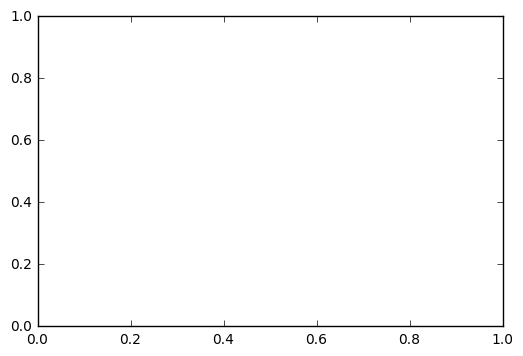

In [197]:
scatter(X, y)